In [2]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


column: PassengerId	 Percent of NaN Value: 0.00%
column:   Survived	 Percent of NaN Value: 0.00%
column:     Pclass	 Percent of NaN Value: 0.00%
column:       Name	 Percent of NaN Value: 0.00%
column:        Sex	 Percent of NaN Value: 0.00%
column:        Age	 Percent of NaN Value: 19.87%
column:      SibSp	 Percent of NaN Value: 0.00%
column:      Parch	 Percent of NaN Value: 0.00%
column:     Ticket	 Percent of NaN Value: 0.00%
column:       Fare	 Percent of NaN Value: 0.00%
column:      Cabin	 Percent of NaN Value: 77.10%
column:   Embarked	 Percent of NaN Value: 0.22%


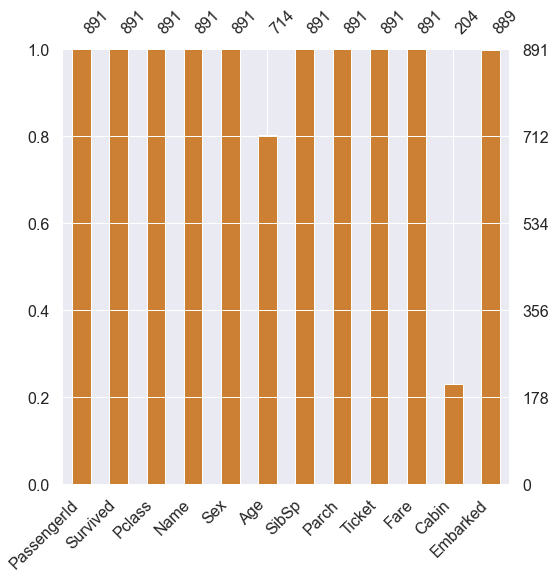

In [7]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

column: PassengerId	 Percent of NaN Value: 0.00%
column:     Pclass	 Percent of NaN Value: 0.00%
column:       Name	 Percent of NaN Value: 0.00%
column:        Sex	 Percent of NaN Value: 0.00%
column:        Age	 Percent of NaN Value: 20.57%
column:      SibSp	 Percent of NaN Value: 0.00%
column:      Parch	 Percent of NaN Value: 0.00%
column:     Ticket	 Percent of NaN Value: 0.00%
column:       Fare	 Percent of NaN Value: 0.24%
column:      Cabin	 Percent of NaN Value: 78.23%
column:   Embarked	 Percent of NaN Value: 0.00%


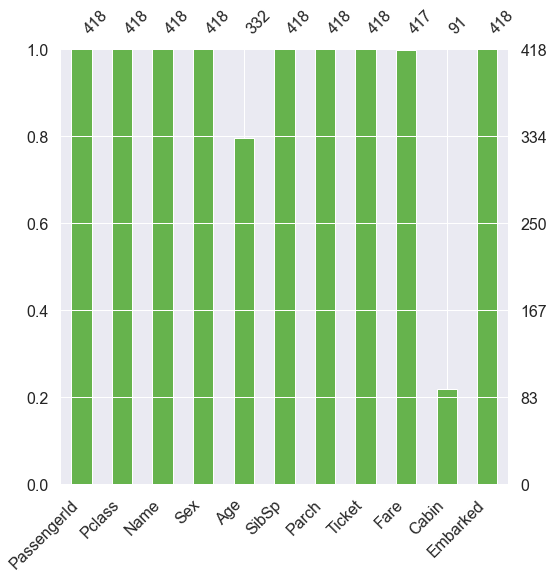

In [9]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN Value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.4, 0.7, 0.3))

아래에 pie 그래프의 autopct부분을 '%.1f'로 수정해도 되지만 그렇게 하면 수치만 나옴(%가 안붙음)

Text(0.5, 1.0, 'Count plot - Survived')

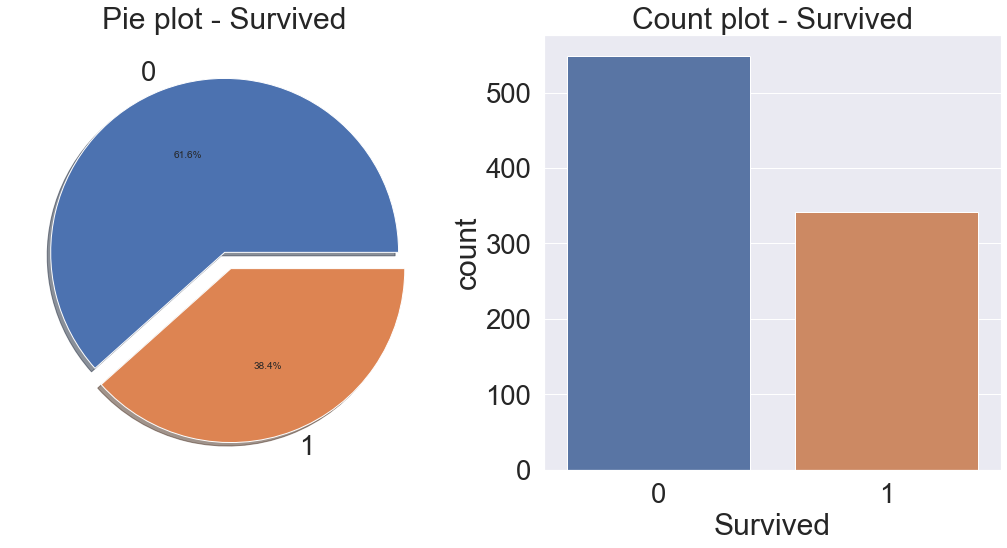

In [17]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')


In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


pd.crosstab().style.background_gradient(cmap='') 으로 크로스탭의 색상지정 가능

In [20]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [25]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


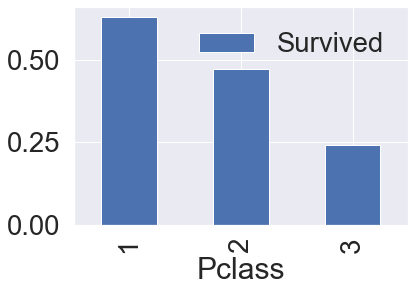

In [26]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

Text(0.5, 1.0, 'Sex: Survived vs Dead')

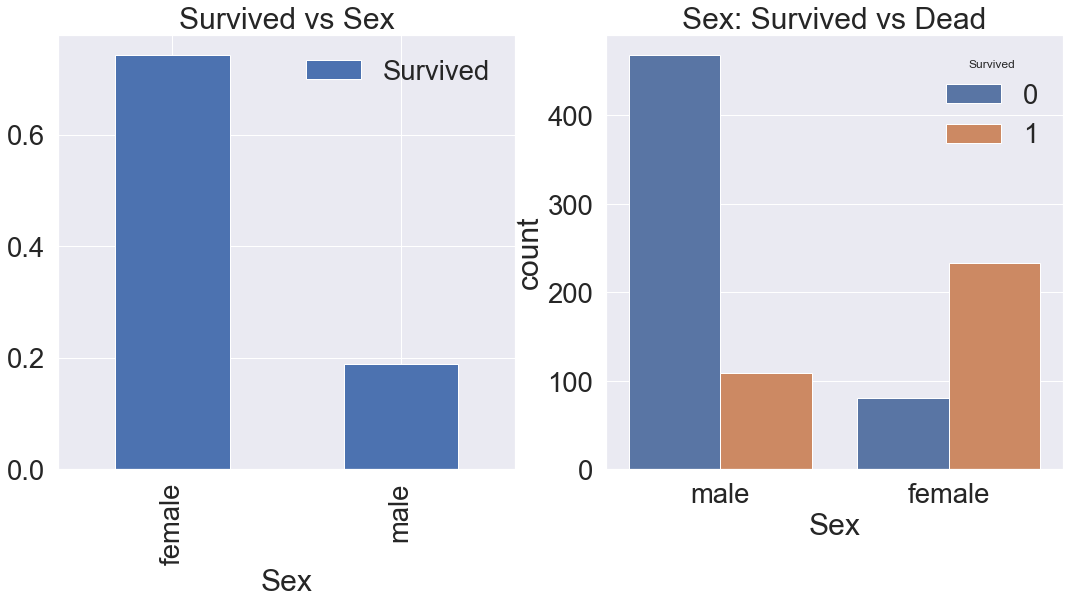

In [28]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

In [30]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [31]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


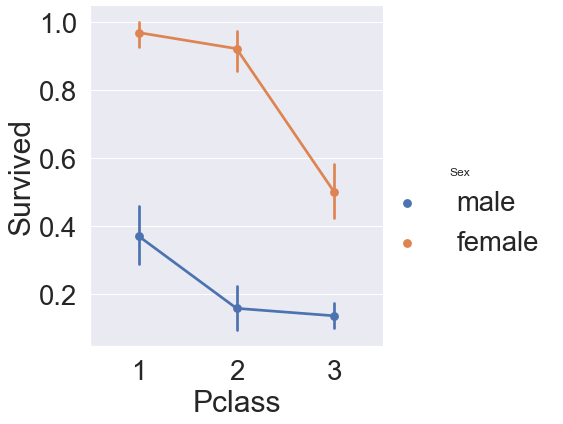

In [36]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1)

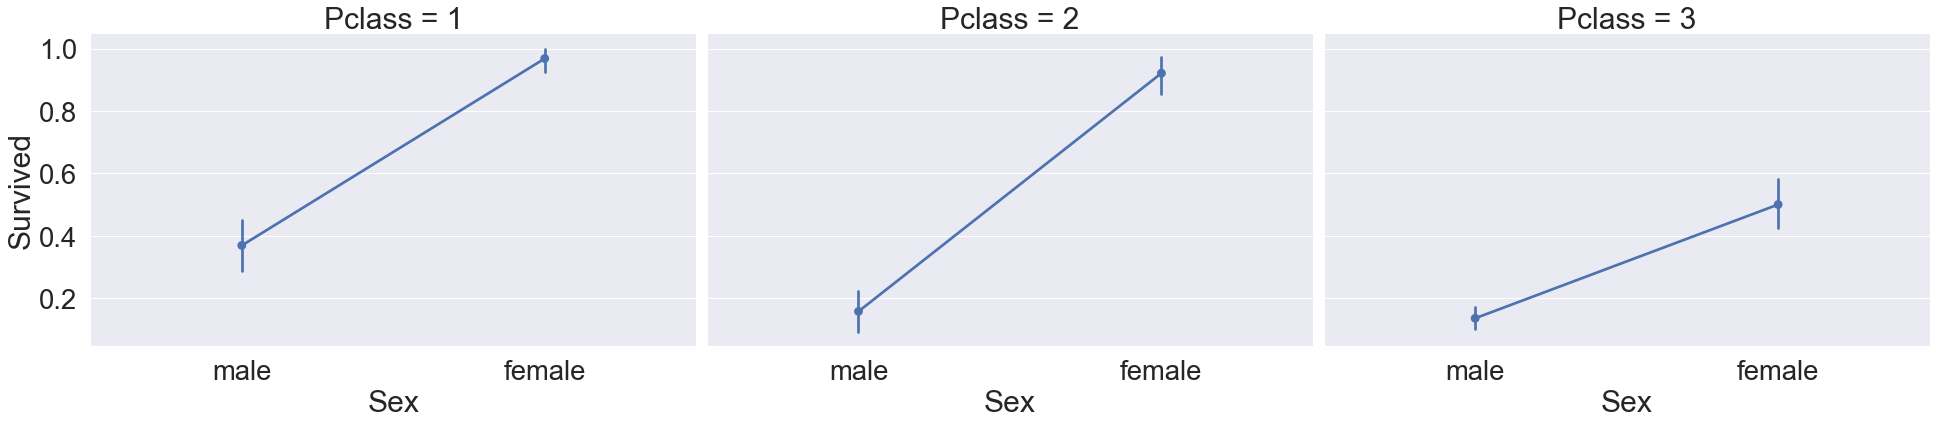

In [38]:
sns.factorplot('Sex', 'Survived', col='Pclass', data=df_train, size=6, aspect=1.5)

In [40]:
print('제일 나이 많은 탑승객 : {:.1f} 살'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객 : {:.1f} 살'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} 살'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 살
제일 나이 어린 탑승객 : 0.4 살
탑승객 평균 나이 : 29.7 살


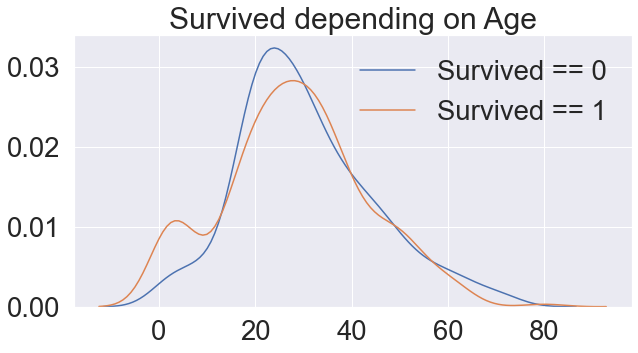

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
ax.set_title('Survived depending on Age')
plt.legend(['Survived == 0', 'Survived == 1'], loc='best')

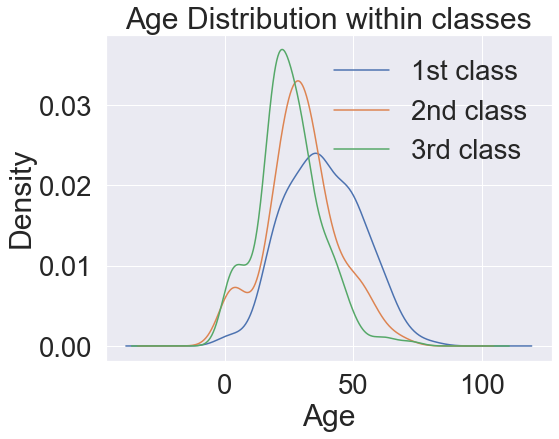

In [53]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd class'])

Text(0.5, 0, 'Range of Age')

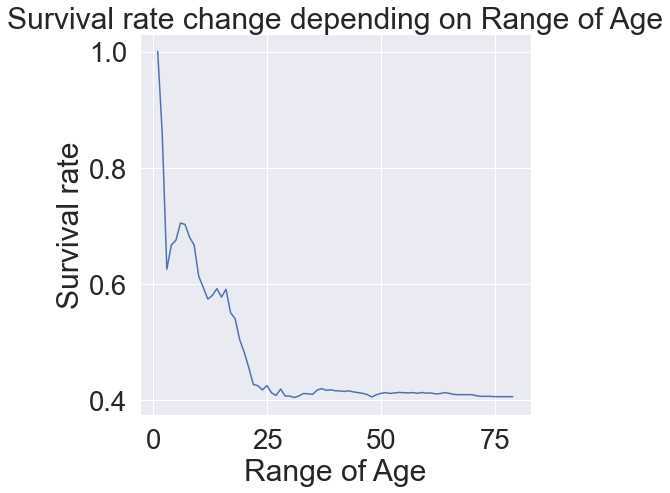

In [57]:
survival_ratio = []
for i in range(80):
    survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(survival_ratio)
plt.title('Survival rate change depending on Range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age')

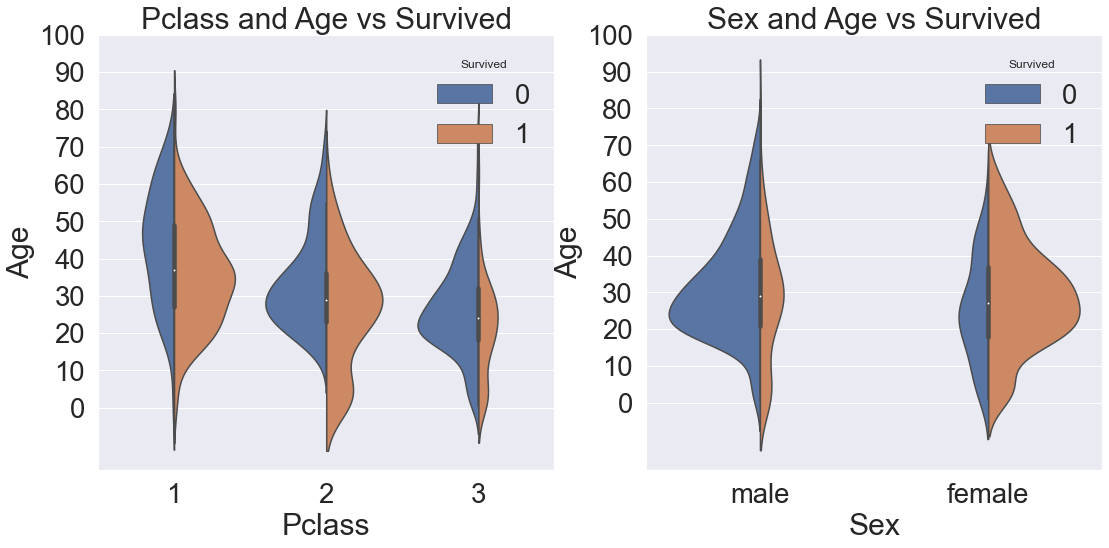

In [58]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

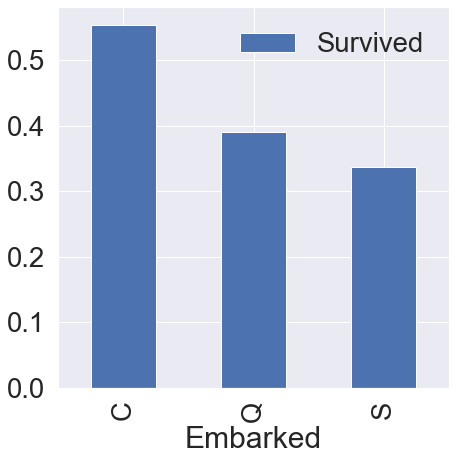

In [61]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

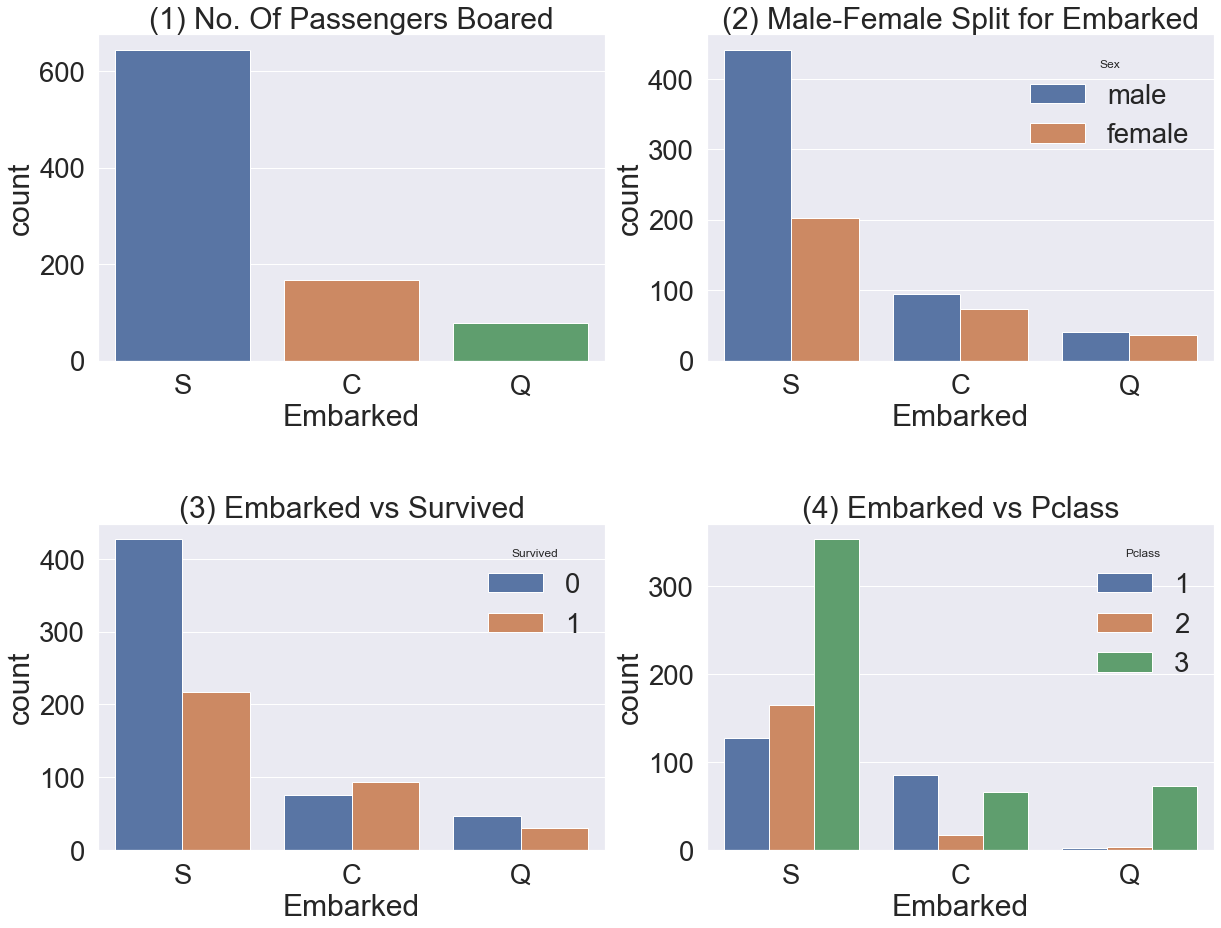

In [67]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. Of Passengers Boared')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [68]:
df_train['Familysize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Familysize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [70]:
print('Maximum size of Family: ', df_train['Familysize'].max())
print('Minimum size of Family: ', df_train['Familysize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


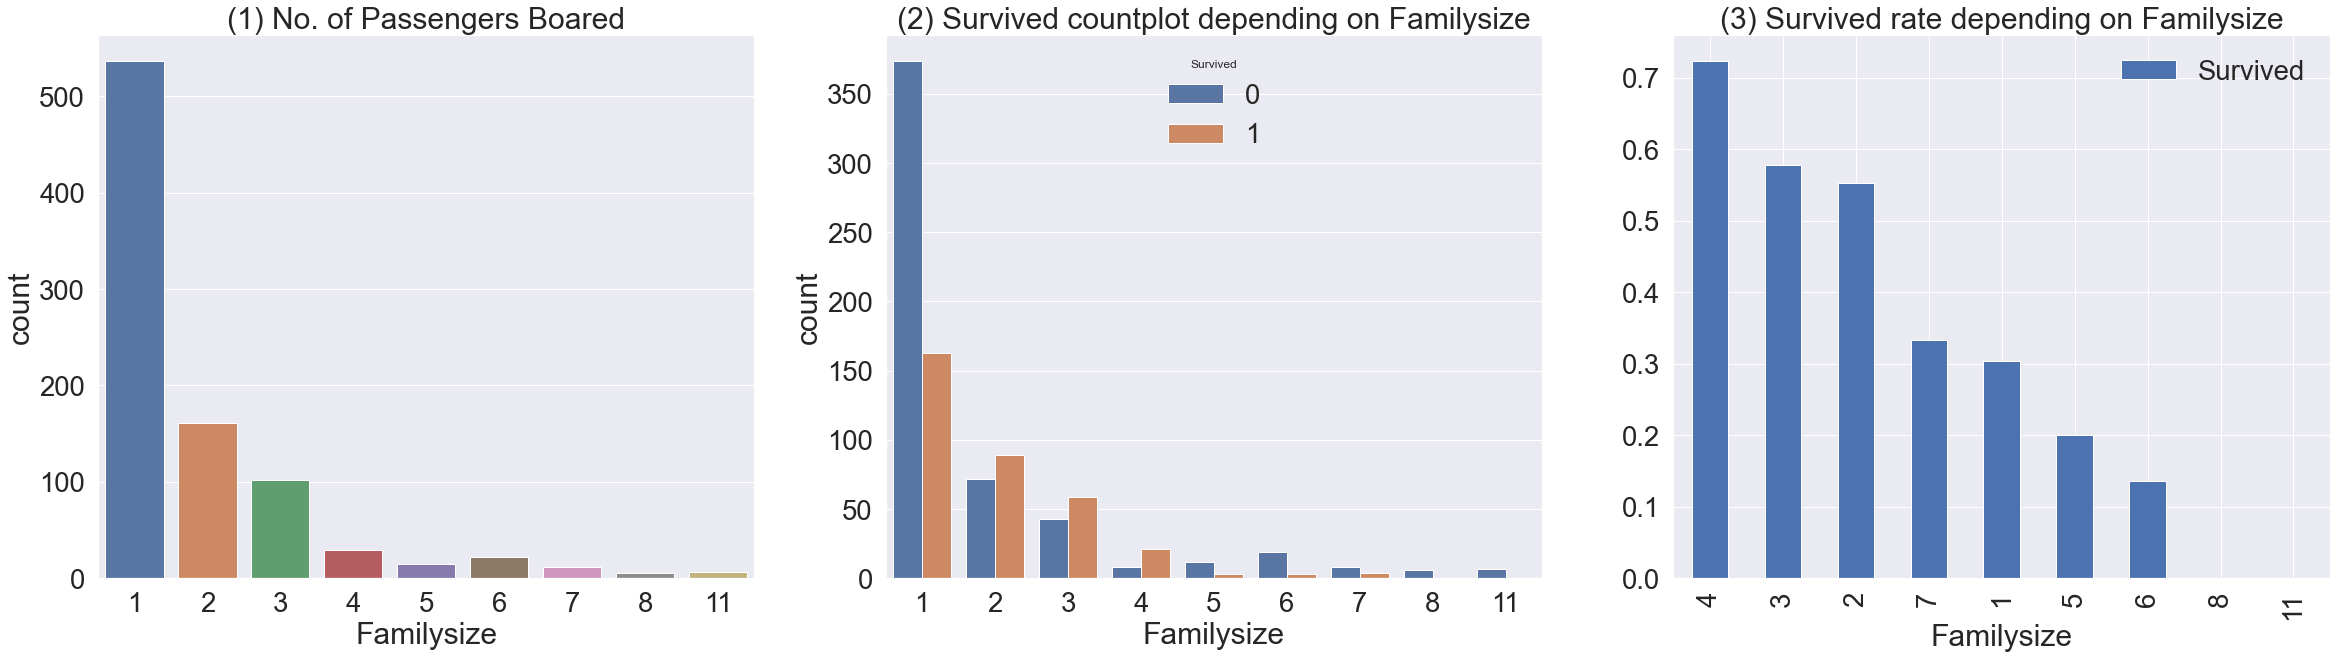

In [73]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('Familysize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boared')

sns.countplot('Familysize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on Familysize')

df_train[['Familysize', 'Survived']].groupby(['Familysize'], as_index=True).mean().sort_values(['Survived'],ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on Familysize')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

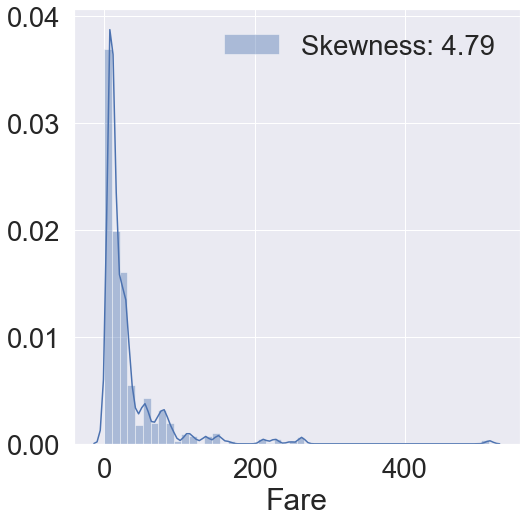

In [76]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [77]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

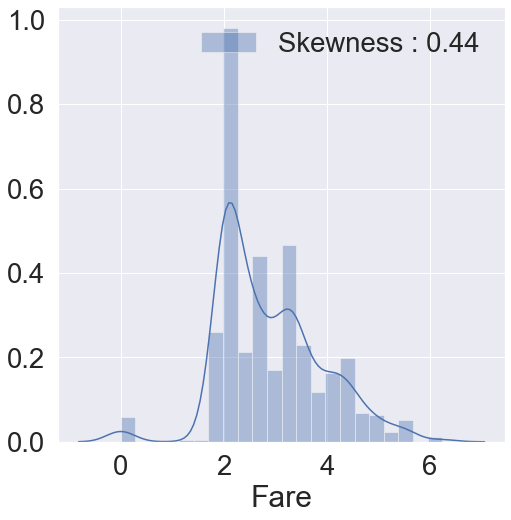

In [78]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [79]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [80]:
df_train['Ticket'].value_counts()

347082                7
1601                  7
CA. 2343              7
CA 2144               6
347088                6
                     ..
349257                1
349239                1
C 7075                1
PC 17475              1
SOTON/O.Q. 3101312    1
Name: Ticket, Length: 681, dtype: int64

In [81]:
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

crosstab().T 는 행렬에서 T처럼 행과 열의 위치를 전환시키는 역할을 함

In [83]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [84]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [85]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Familysize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


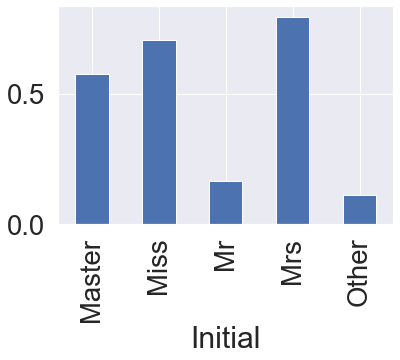

In [86]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [88]:
df_train.groupby('Initial')['Survived'].mean()

Initial
Master    0.575000
Miss      0.704301
Mr        0.162571
Mrs       0.795276
Other     0.111111
Name: Survived, dtype: float64

```df_train.groupby('Initial').mean()```  
의 결과로 master, miss, mr, mrs, other의 평균나이를 알 수 있었고 그 값으로 NaN을 대체함

In [90]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [91]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [92]:
df_train['Embarked'].fillna('S', inplace=True)

In [93]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [94]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [95]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [96]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [97]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [98]:
df_train['Embarked'].isnull().any()

False

In [99]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

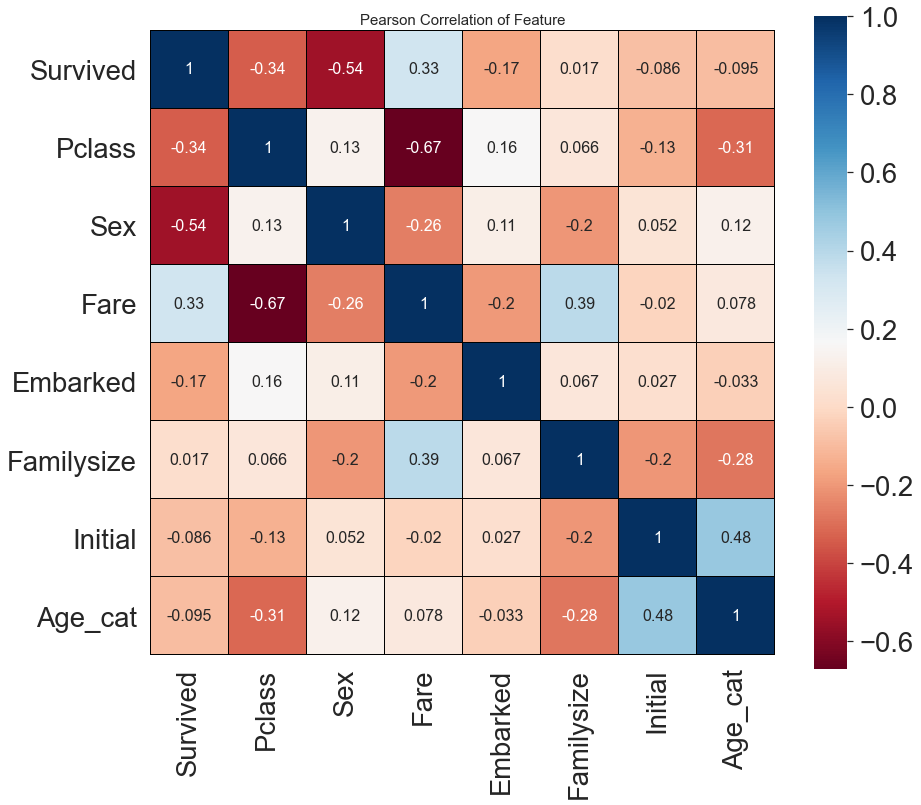

In [101]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Familysize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Feature', size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=True, annot_kws={'size': 16})

del heatmap_data

In [102]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [103]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Familysize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [104]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [105]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [106]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Familysize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [108]:
x_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
x_test = df_test.values

In [109]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, target_label, test_size=0.3, random_state=2018)

In [110]:
model = RandomForestClassifier()
model.fit(x_tr, y_tr)
prediction = model.predict(x_val)

In [113]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_val.shape[0], 100 * metrics.accuracy_score(prediction, y_val)))

총 268명 중 83.96% 정확도로 생존을 맞춤


In [114]:
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

Text(0, 0.5, 'Feature')

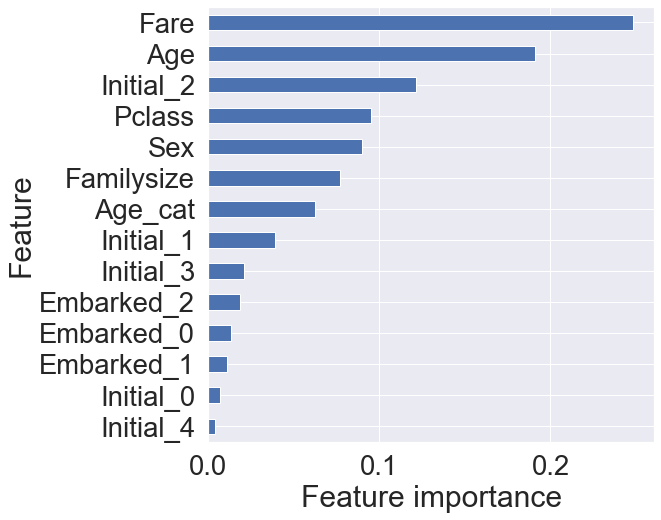

In [115]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')


In [116]:
submission = pd.read_csv('gender_submission.csv')

In [117]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [118]:
prediction = model.predict(x_test)
submission['Survived'] = prediction

In [119]:
submission.to_csv('./my_third_submission.csv', index=False)